#  Decision Trees & Outlier Detection — Class Notes

This notebook documents key concepts discussed in today’s class, focusing on **Decision Tree models**, **data modeling fundamentals**, and **outlier detection techniques using PyOD**.  
The aim is to understand **when and why** these techniques are used, not just how to apply them.

---

##  When to Use a Decision Tree?

A Decision Tree is suitable when:
- The problem requires **clear and interpretable rules**
- The dataset contains **non-linear relationships**
- Feature interactions are important
- Minimal feature preprocessing is preferred

Decision Trees work well for **classification and regression** tasks where understanding the **decision logic** matters.

---

##  What is a Data Model?

A **data model** defines how input features are structured and related to the target variable.

In machine learning:
- Inputs → Features  
- Output → Target  
- Model → Learns patterns mapping features to target  

A good data model ensures:
- Relevant features are selected
- Noise and redundancy are minimized
- The learning algorithm can generalize well

---

##  Advantages of Decision Tree Models

- Easy to understand and visualize
- Works with both numerical and categorical data
- Handles non-linear patterns naturally
- No strict requirement for feature scaling
- Can be used as a base model for ensemble methods

These properties make Decision Trees a good **starting point for model building**.

---

##  Outlier Detection Using PyOD

**PyOD (Python Outlier Detection)** is a library that provides multiple algorithms for detecting anomalies in data.

Outlier detection is useful when:
- Data contains rare or abnormal observations
- Anomalies can distort model performance
- Preprocessing is required before training models

---

##  Isolation Forest

Isolation Forest detects outliers by:
- Randomly selecting features
- Randomly splitting feature values

Outliers are isolated **faster** because they require fewer splits.

Key characteristics:
- Works well for large datasets
- Does not rely on distance or density
- Efficient and scalable

---

##  Local Outlier Factor (LOF)

LOF identifies outliers based on **local density deviation**.

A point is considered an outlier if:
- Its local density is significantly lower than its neighbors

Important aspects:
- Sensitive to local data structure
- Effective for clustered data
- Requires careful selection of neighbors

---

##  Truncation

Truncation is a simple technique used to:
- Limit extreme values in features
- Reduce the impact of outliers

It involves:
- Capping values at defined thresholds (min/max)
- Preventing extreme values from influencing the model disproportionately

---

##  Pruning in Decision Trees

Pruning is used to reduce **overfitting** in Decision Trees.

Types:
- **Pre-pruning**: Stop tree growth early (max depth, min samples)
- **Post-pruning**: Remove branches after full growth

Pruning improves:
- Model generalization
- Stability on unseen data

---

##  Feature Scaling

Feature scaling ensures that features are on a comparable range.

Common techniques:
- Standardization
- Min–Max scaling

While Decision Trees do not require scaling, it is essential for:
- Distance-based models
- Gradient-based algorithms

---

##  Data Transformation

Data transformation improves feature representation.

Examples:
- Log transformation for skewed data
- Encoding categorical variables
- Normalization for consistent distributions

Proper transformation helps models learn more meaningful patterns.

---

##  Building the Model

General steps followed:
1. Data understanding and cleaning
2. Outlier detection and treatment
3. Feature scaling or transformation (if required)
4. Model selection
5. Training and evaluation

Each step contributes to building a **reliable and reproducible machine learning pipeline**.

---



---

---

#  Wine Dataset Classification — KNN & Decision Tree Analysis 

- This notebook explores baseline and tree-based classification models using the Wine dataset, with emphasis on interpretability, preprocessing, and feature importance analysis.


In [1]:
import pandas as pd

In [2]:
data = pd.read_csv(r"C:\Users\sande\Downloads\wine_data.csv")

In [3]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
data['quality'].unique() # quantity is a ordinal categorical variable


array([5, 6, 7, 4, 8, 3], dtype=int64)

- classification problem of 6 classes(3,4,5,6,7,8)
- simplify 2 classes good,poor
- whenever quality of wine is >5 then consider it as good
- whenever quality of wine is other consider it as poor

In [9]:
# If quality > 5, -> 'good' otherwise 'poor'
# good -> 1, poor -> 0
data['quality'] = data['quality'].apply(lambda x:1 if x>5 else 0)
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


## EDA

### Missing values

####  Minimal Exploratory Data Analysis (EDA)

- Basic checks are performed to understand data structure, feature types, and class distribution.  
- |The goal is validation, not deep statistical analysis.


In [10]:
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [11]:
data.duplicated().sum()

240

In [13]:
data = data.drop_duplicates()
data.shape

(1359, 12)

In [14]:
data.describe(percentiles=[0.05, 0.15, 0.25, 0.5, 0.75, 0.85, 0.95])

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,0.529065
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.499338
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,0.000000
5%,6.100000,0.270000,0.000000,1.600000,0.053000,4.000000,11.000000,0.993569,3.060000,0.470000,9.200000,0.000000
15%,6.800000,0.340000,0.030000,1.800000,0.064000,6.000000,16.000000,0.994950,3.157000,0.520000,9.400000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,0.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,1.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,1.000000
85%,10.130000,0.700000,0.490000,2.965000,0.100000,27.000000,84.000000,0.998420,3.460000,0.800000,11.700000,1.000000


### Segragate the data

#### The dataset is split into:
- Features (X)
- Target variable (y)

- This prepares the data for model training and evaluation.

In [15]:
X = data.drop('quality', axis = 1)
y = data['quality']
X.shape, y.shape

((1359, 11), (1359,))

### Split the data into training and testing

The data is divided into training and testing sets to evaluate model performance on unseen data.

In [16]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1087, 11), (272, 11), (1087,), (272,))

## Baseline models

#### Baseline Model — KNN Classifier

- A K-Nearest Neighbors (KNN) classifier is used as a baseline to compare performance against tree-based models.

In [19]:
from sklearn.neighbors import KNeighborsClassifier

In [20]:
knn = KNeighborsClassifier()
knn

KNeighborsClassifier()

In [21]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [22]:
knn.score(X_train, y_train)

0.7506899724011039

In [23]:
y_pred = knn.predict(X_test)
y_pred

array([0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0], dtype=int64)

In [24]:
from sklearn.metrics import accuracy_score

In [25]:
accuracy_score(y_pred,y_test)

0.5919117647058824

In [26]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [38]:
dt.tree_.max_depth

17

In [39]:
# max_depth=None, min_samples_split=2, min_samples_leaf=1
dt = DecisionTreeClassifier()
dt

DecisionTreeClassifier()

In [40]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [41]:
dt.score(X_train,y_train)

1.0

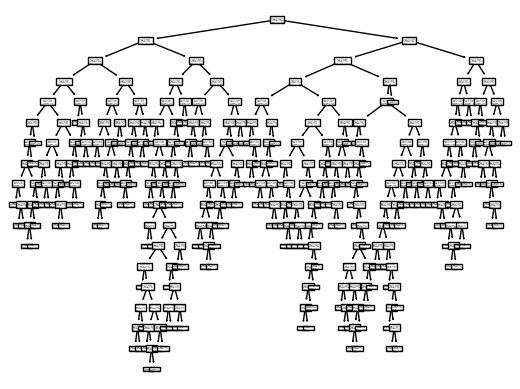

In [43]:
plot_tree(dt)
plt.show()

In [44]:
dt.tree_.max_depth

17

In [31]:
y_pred = dt.predict(X_test)
y_pred

array([1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1], dtype=int64)

#### KNN Model Evaluation
- Accuracy score is used to measure baseline performance on the test dataset.


In [32]:
accuracy_score(y_pred, y_test)

0.6544117647058824

### Truncation (Outlier Handling)

- Truncation is applied to limit extreme feature values and reduce their influence on the model.


In [34]:
dt.feature_importances_

array([0.07025188, 0.08681767, 0.04402779, 0.04422664, 0.06658373,
       0.06838374, 0.1016131 , 0.02571179, 0.05079867, 0.16061258,
       0.28097242])

In [36]:
import matplotlib.pyplot as plt

<BarContainer object of 11 artists>

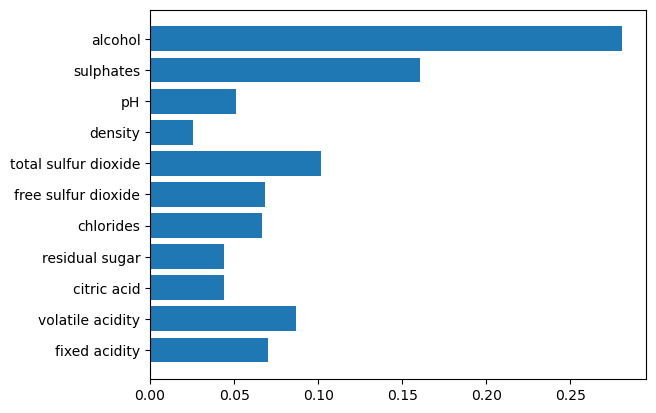

In [37]:
plt.barh(width = dt.feature_importances_,y=X.columns)

#### Key Observations

- KNN serves as a simple baseline model
- Decision Trees capture non-linear relationships
- Tree depth controls model complexity
- Truncation helps stabilize feature influence
- Feature importance improves interpretability
